<a href="https://colab.research.google.com/github/marcgym2/MachineLearning/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea (8 puntos)

- Aplica los modelos de selección de características cuidando los supuestos de cada modelo
- Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema (cita tus fuentes)
- Con base en tu investigación, determina las características más relevantes de tu conjunto de datos
- Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección

## Selección de características

La selección de características es un paso crítico en el proceso de análisis de datos y puede tener un impacto significativo en el rendimiento de un modelo de aprendizaje automático. Consiste en identificar y seleccionar las características más relevantes de un conjunto de datos para mejorar la precisión y eficiencia del modelo. Python es un lenguaje de programación popular que ofrece una amplia gama de herramientas y bibliotecas.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown
import matplotlib.pyplot as plt

# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
df_measures = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/measures_v2.csv")


## Métodos de Filtro

Los métodos de filtro son una técnica de selección de características que evalúan la importancia de cada característica individual y la seleccionan en función de un criterio específico. Estos métodos no tienen en cuenta las interacciones entre las características y, por lo tanto, son considerados como métodos univariantes.

Algunos ejemplos comunes de métodos de filtro incluyen:

- Correlación: Evalúa la correlación lineal entre cada característica y la variable objetivo. Las características altamente correlacionadas se consideran importantes y se seleccionan.
- Información mutua: Evalúa la relación entre cada característica y la variable objetivo mediante la medida de la información mutua. Las características con una mayor información mutua son consideradas importantes y se seleccionan.
- Análisis de componentes principales (PCA): Una técnica de reducción de dimensionalidad que busca identificar las características más importantes en un conjunto de datos.

## ANOVA de valor F

Primeramente, se utiliza el valor "F" para determinar si la varianza explicada por una característica es estadísticamente significativa en relación con la varianza residual. Si el valor "F" es alto, indica que la característica es un buen predictor de la variable objetivo y, por lo tanto, es importante para el modelo. 

In [4]:
from sklearn.feature_selection import r_regression # Calcula la r de Pearson para cada característica y el objetivo.

In [5]:
# Definiendo feature y target variable para Regresión
X_reg=df_measures.iloc[:,0:10] # Caracteristicas
y_reg=df_measures.iloc[:,11] # Target variable: Torque

In [13]:
# hipótesis nula: todos los coeficientes de regresión son iguales a cero. 
# hipótesis alternativa: el modelo tiene capacidad predictiva.
f_value = f_regression(X_reg, y_reg)
# Regresa arreglo de estadístico F y valor p
f_value

(array([2.51594099e+04, 9.48874445e+04, 1.22516302e+04, 1.75107803e+06,
        4.51351673e+02, 2.57001059e+03, 1.08105001e+05, 1.86825276e+08,
        1.85146022e+04, 1.85082736e+04]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        3.80754558e-100, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000]))

In [15]:
pass_test = []
not_pass_test = []
alpha = 0.05
for i in range(len(f_value[1])):
    print(X_reg.columns[i], f_value[1][i])
    if f_value[1][i] < alpha:
        pass_test.append(X_reg.columns[i])
    else:
        not_pass_test.append(X_reg.columns[i])

u_q 0.0
coolant 0.0
stator_winding 0.0
u_d 0.0
stator_tooth 3.807545578931197e-100
motor_speed 0.0
i_d 0.0
i_q 0.0
pm 0.0
stator_yoke 0.0


Los coeficientes de regresión iguales a cero pueden no aportar al modelo. 

In [80]:
df_results = pd.DataFrame(f_value[0], index=X_reg.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

,f_value
i_q,1.868253e+08
u_d,1.751078e+06
i_d,1.081050e+05
coolant,9.488744e+04
u_q,2.515941e+04
pm,1.851460e+04
stator_yoke,1.850827e+04
stator_winding,1.225163e+04
motor_speed,2.570011e+03
stator_tooth,4.513517e+02


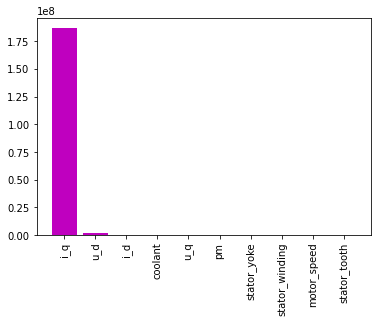

In [82]:
plt.figure()
plt.bar(df_results.drop(not_pass_test).index, df_results.drop(not_pass_test).f_value, color= "m")
plt.xticks(rotation='vertical')
plt.show()

## Valor R de correlación

In [11]:
from sklearn.feature_selection import f_regression

In [7]:
r_value = r_regression(X_reg, y_reg)
r_value

array([-0.13621491, -0.2579824 ,  0.09550988, -0.75377901, -0.01841303,
       -0.04390256, -0.27409728,  0.99645726, -0.11713814, -0.11711839])

In [91]:
df_results['r_value'] = r_value
colors = []
for v in df_results['r_value']:
    if v > 0:
        colors.append('g')
    else:
        colors.append('r')

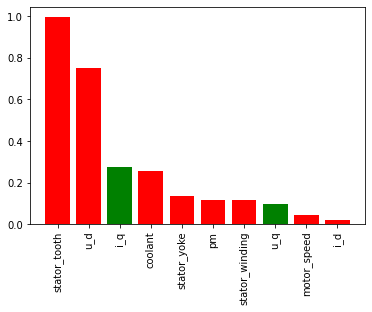

In [92]:
df_results['r_value_abs'] = df_results['r_value'].abs()
df_results.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_results.index, df_results.r_value_abs, color = colors)
plt.xticks(rotation='vertical')
plt.show()

# El 99% de la variación en el torque puede ser explicada por el devanado del estator

## Umbral de varianza

Este estimador escala y traduce cada característica individualmente de modo que esté en el rango dado en el conjunto de entrenamiento, p. entre cero y uno.

In [78]:
# Normalización de variables,
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_reg)
x_scaled = pd.DataFrame(scaled, columns = X_reg.columns)
x_scaled

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke
0,0.156891,0.089931,0.004079,0.498784,0.001697,0.043909,0.999829,0.493043,0.039863,0.002887
1,0.157680,0.090078,0.004126,0.498953,0.001714,0.043908,0.999816,0.493041,0.039689,0.002868
2,0.156953,0.090190,0.004101,0.498699,0.001707,0.043909,0.999818,0.493043,0.039760,0.003005
3,0.157672,0.090265,0.004050,0.498913,0.001690,0.043909,0.999813,0.493046,0.039861,0.003059
4,0.156762,0.090501,0.004046,0.498852,0.001678,0.043909,0.999582,0.493105,0.039983,0.003009
...,...,...,...,...,...,...,...,...,...,...
1330811,0.146145,0.220913,0.217375,0.503126,0.253702,0.043908,0.992620,0.494887,0.445186,0.247703
1330812,0.145472,0.220914,0.217086,0.503077,0.253004,0.043909,0.992619,0.494887,0.445130,0.247735
1330813,0.146283,0.220914,0.216863,0.503176,0.252321,0.043909,0.992623,0.494889,0.445084,0.247670
1330814,0.145410,0.220914,0.216715,0.503017,0.251867,0.043909,0.992617,0.494884,0.445031,0.247727


In [38]:
from sklearn.feature_selection import VarianceThreshold
# Analiza solo las carácteristicas (X) 

In [39]:
# Selector de funciones que elimina todas las funciones de baja varianza.
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.07784004, 0.05734806, 0.05453596, 0.05754873, 0.05985889,
       0.0878138 , 0.05453442, 0.02399166, 0.04197112, 0.05791181])

In [95]:
# Se agregan las varianzas a los resultados y se ordenan de mandera descendente. 
df_results['variance'] = selector.variances_
df_results.sort_values('variance', ascending = False, inplace = True)
df_results

,f_value,r_value,r_value_abs,variance
pm,1.851460e+04,-0.117138,0.117138,0.087814
stator_tooth,4.513517e+02,0.996457,0.996457,0.077840
stator_yoke,1.850827e+04,-0.136215,0.136215,0.059859
i_d,1.081050e+05,-0.018413,0.018413,0.057912
coolant,9.488744e+04,-0.257982,0.257982,0.057549
u_d,1.751078e+06,-0.753779,0.753779,0.057348
i_q,1.868253e+08,-0.274097,0.274097,0.054536
stator_winding,1.225163e+04,-0.117118,0.117118,0.054534
motor_speed,2.570011e+03,-0.043903,0.043903,0.041971
u_q,2.515941e+04,0.095510,0.095510,0.023992


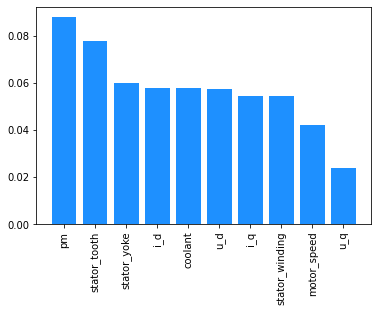

In [96]:
plt.figure()
plt.bar(df_results.index, df_results.variance, color = "dodgerblue")
plt.xticks(rotation='vertical')
plt.show()

## Información mutua

In [43]:
from sklearn.feature_selection import mutual_info_regression

In [44]:
mi = mutual_info_regression(X_reg, y_reg, random_state=0)
mi

array([2.98123315, 1.04965855, 1.65481358, 3.19604174, 1.62333745,
       2.44849982, 2.88233283, 4.05855264, 1.41835752, 1.65881083])

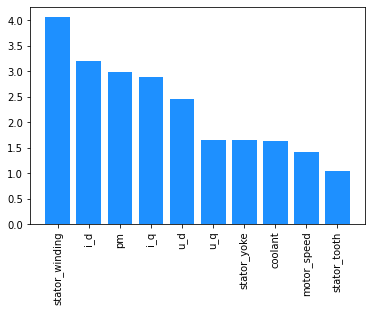

In [97]:
# Agregarlo a los resultados
df_results['mi'] = mi
df_results.sort_values('mi', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results.index, df_results.mi, color ="dodgerblue")
plt.xticks(rotation='vertical')
plt.show()

Las características con una mayor información mutua son consideradas importantes y se seleccionan. Se agrega la media de los valores normalizados para facilitar la visualización.

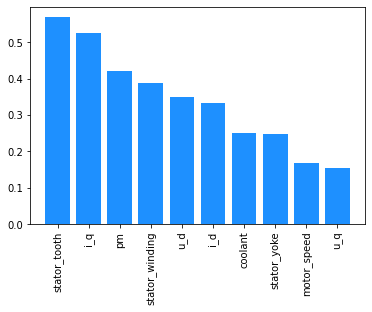

In [98]:
scaled = scaler.fit_transform(df_results)
df_results_scaled = pd.DataFrame(scaled, columns = df_results.columns)
df_results_scaled.set_index(df_results.index, inplace = True)
df_results_scaled['norm_mean'] = df_results_scaled.mean(axis = 1)
df_results_scaled.sort_values('norm_mean', ascending = False, inplace = True)

plt.figure()
plt.bar(df_results_scaled.index, df_results_scaled.mean(axis = 1), color ="dodgerblue")
plt.xticks(rotation='vertical')
plt.show()

Se concluye que las características que parecen ser importantes son:
- i_q: Current medición del componente q en coordenadas dq.
- pm: Temperatura de imán permanente (en °C) medida con termopares y transmitida de forma inalámbrica a través de una unidad de termografía.
- stator_yoke: Temperatura del yugo del estator (en °C) medida con termopares
- stator_tooth: Temperatura del diente del estator (en °C) medida con termopares

Podemos observar que el estator es importante debido a que la función de un motor eléctrico es la de convertir energía eléctrica en energía cinética o movimiento. El estátor tiene la función de “trabajar” la energía eléctrica para crear con ella un campo magnético.



# Referencias bibliográficas

G., & E. (2003). An introduction to variable and feature selection. Journal of Machine Learning Research. https://doi.org/10.5555/944919.944968